In [1]:
import codebase.match_data as match
import codebase.settings as settings
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib as plt
import seaborn as sns
import codebase.analysis_functions as af
import string
import sklearn
import numpy as np
m  = match.MatchData('1263466')
%load_ext autoreload
%autoreload 2

In [2]:
fifth_ashes_test = af.pre_transform_comms(m)


In [3]:
fours = fifth_ashes_test[fifth_ashes_test['isFour'] == True]
sixes = fifth_ashes_test[fifth_ashes_test['isSix'] == True]
wickets = fifth_ashes_test[fifth_ashes_test['isWicket'] == True]

In [4]:
fours = fours[['commentTextItems', 'isFour']]
sixes = sixes[['commentTextItems', 'isSix']]
wickets = wickets[['commentTextItems', 'isWicket']]

In [5]:
fours.head()

,commentTextItems,isFour
54,"Neatly put away, firmly clips a straight deliv...",True
66,Goes fuller outside off and is driven through ...,True
69,"Fuller and he drives again, good response from...",True
77,Great shot! fantastic from labuschagne. full a...,True
88,Caressed through the covers. wood pitches it u...,True


In [6]:
fours.shape

(94, 2)

In [7]:
def verify_if_string_exists(string, value):
    if string in value:
        return True
    return False

def verify_fours(value):
    return verify_if_string_exists('four', value)

def verify_six(value):
    return verify_if_string_exists('six', value)

def verify_wicket(value):
    return verify_if_string_exists('wicket', value)

In [8]:
fours['verify'] = fours['commentTextItems'].map(verify_fours)

In [9]:
fours.head()

,commentTextItems,isFour,verify
54,"Neatly put away, firmly clips a straight deliv...",True,False
66,Goes fuller outside off and is driven through ...,True,False
69,"Fuller and he drives again, good response from...",True,False
77,Great shot! fantastic from labuschagne. full a...,True,False
88,Caressed through the covers. wood pitches it u...,True,False


In [10]:
fours[fours['verify'] == True]

,commentTextItems,isFour,verify
91,"Half-volley, wide outside off stump, flogged a...",True,True
95,"Targets the pads with a full, straight ball, b...",True,True
243,"On a length outside off, pounded through point...",True,True
484,"Half-volley, driven through wide mid-off for f...",True,True
490,Loose outside off but crawley picks up four. s...,True,True
615,"Full and straight, 92mph/149kph, clipped off t...",True,True
645,"Back of a length outside off stump, and billin...",True,True
1001,Runs away through backward point for four more...,True,True
1043,"Banged in short, pulled away through midwicket...",True,True
1123,"Full on the pads, 90mph/145kph, clipped away e...",True,True


In [11]:
sixes['verify'] = sixes['commentTextItems'].map(verify_six)
wickets['verify'] = wickets['commentTextItems'].map(verify_wicket)

In [12]:
sixes[sixes['verify'] == True]

,commentTextItems,isSix,verify
702,"Pulled for six! not convincing at all, but woa...",True,True


In [13]:
wickets[wickets['verify'] == True]

,commentTextItems,isWicket,verify
53,"Edged, taken this time! broad in the wickets. ...",True,True
293,Falls a ball later! very similar shot to the o...,True,True
348,Taken at deep midwicket! the short ball tactic...,True,True
403,"Top edge, taken at deep square leg! more deser...",True,True
737,"Dragged on! full outside off, broad reaches ou...",True,True
1074,"Edged, caught behind! no half century for care...",True,True
1082,Cleaned up! a career-best six-wicket haul by w...,True,True
1179,Chopped on! australia have the breakthrough an...,True,True
1207,Brilliant bowling! this has been outstanding f...,True,True
1293,Feeble chip to mid-on! boland has another and ...,True,True


In [14]:
def create_dictionary(words, reverse = False):
    dictionary = {}
    for word in words:
        if word in dictionary:
            dictionary[word] += 1
        else:
            dictionary[word] = 1
    return dict(sorted(dictionary.items(), key=lambda item: item[1], reverse= not reverse))

In [15]:
fours_words = []
for entry in fours['commentTextItems']:
    entry = entry.translate(str.maketrans('', '', string.punctuation))
    entry = entry.split()
    fours_words += [e.lower() for e in entry]

In [16]:
fours_dict = create_dictionary(fours_words)
fours_dict

{'the': 154,
 'and': 89,
 'a': 83,
 'through': 65,
 'off': 59,
 'it': 46,
 'of': 44,
 'to': 42,
 'outside': 32,
 'on': 30,
 'away': 27,
 'full': 27,
 'for': 25,
 'from': 24,
 'in': 23,
 'shot': 22,
 'back': 22,
 'with': 21,
 'but': 19,
 'drive': 19,
 'into': 19,
 'length': 17,
 'stump': 16,
 'forward': 16,
 'gets': 16,
 'pads': 16,
 'leg': 16,
 'at': 15,
 'point': 15,
 'midwicket': 14,
 'his': 14,
 'over': 14,
 'cover': 14,
 'as': 14,
 'straight': 13,
 'he': 13,
 'halfvolley': 13,
 'four': 13,
 'drives': 12,
 'short': 12,
 'down': 12,
 'side': 12,
 'edge': 12,
 'is': 11,
 'up': 11,
 'head': 11,
 'wide': 11,
 'him': 11,
 'square': 11,
 'foot': 10,
 'rope': 9,
 'front': 9,
 'this': 9,
 'crawley': 9,
 'timing': 8,
 'midoff': 8,
 'has': 8,
 'covers': 8,
 'wood': 8,
 'way': 8,
 'gully': 8,
 'gap': 7,
 'woakes': 7,
 'leans': 7,
 'fine': 7,
 'an': 7,
 'clipped': 7,
 'billings': 7,
 'runs': 7,
 'lovely': 7,
 'ground': 7,
 'delivery': 6,
 'just': 6,
 'enough': 6,
 'again': 6,
 'good': 6,
 'labu

In [17]:
fours_dict = af.create_vocabulary(fours, m)

In [18]:
wickets_dict = af.create_vocabulary(wickets, m)
wickets_dict

{'the': 107,
 'a': 67,
 'and': 64,
 'to': 54,
 'it': 41,
 'for': 33,
 'at': 28,
 'his': 26,
 'off': 23,
 'of': 23,
 'from': 21,
 'in': 21,
 'on': 21,
 'leg': 21,
 'short': 20,
 'length': 18,
 'into': 17,
 'edge': 15,
 'he': 13,
 'ball': 13,
 'but': 13,
 'outside': 12,
 'is': 12,
 'stump': 12,
 'him': 12,
 'through': 12,
 'up': 11,
 'back': 10,
 'takes': 10,
 'its': 10,
 'has': 10,
 'taken': 9,
 'england': 9,
 'over': 9,
 'away': 9,
 'bat': 9,
 'side': 9,
 'catch': 9,
 'down': 9,
 'as': 8,
 'that': 8,
 'full': 7,
 'was': 7,
 'square': 7,
 'another': 7,
 'inside': 7,
 'stumps': 7,
 'good': 7,
 'long': 6,
 'this': 6,
 'way': 6,
 'gets': 6,
 'pad': 6,
 'have': 6,
 'out': 6,
 'goes': 6,
 'an': 6,
 'behind': 6,
 'edged': 5,
 'second': 5,
 'time': 5,
 'forward': 5,
 'round': 5,
 'straight': 5,
 'one': 5,
 'wicket': 5,
 'delivery': 5,
 'top': 5,
 'looks': 5,
 'by': 5,
 'brilliant': 5,
 'well': 5,
 'drive': 5,
 'wickets': 4,
 'been': 4,
 'looking': 4,
 'work': 4,
 'after': 4,
 'get': 4,
 'thin'

In [19]:
player_list = af.get_player_map(m, name_tag='known_as').values()
list(player_list)
player_list = [name.lower() for player in player_list for name in player.split()]
player_list

['david',
 'warner',
 'usman',
 'khawaja',
 'marnus',
 'labuschagne',
 'steven',
 'smith',
 'travis',
 'head',
 'cameron',
 'green',
 'alex',
 'carey',
 'mitchell',
 'starc',
 'pat',
 'cummins',
 'nathan',
 'lyon',
 'scott',
 'boland',
 'rory',
 'burns',
 'zak',
 'crawley',
 'dawid',
 'malan',
 'joe',
 'root',
 'ben',
 'stokes',
 'ollie',
 'pope',
 'sam',
 'billings',
 'chris',
 'woakes',
 'mark',
 'wood',
 'stuart',
 'broad',
 'ollie',
 'robinson']

In [20]:
sixes_vocab = af.create_vocabulary(sixes, m)

In [21]:
sixes_vocab

{'the': 7,
 'over': 5,
 'deep': 4,
 'and': 3,
 'square': 3,
 'leg': 3,
 'but': 3,
 'short': 3,
 'it': 3,
 'from': 3,
 'top': 2,
 'edge': 2,
 'this': 2,
 'midwicket': 2,
 'thats': 2,
 'of': 2,
 'ball': 2,
 'back': 2,
 'pulled': 2,
 'not': 2,
 'a': 2,
 'another': 1,
 'just': 1,
 'rope': 1,
 'timedeep': 1,
 'converged': 1,
 'couldnt': 1,
 'quite': 1,
 'get': 1,
 'there': 1,
 'huge': 1,
 'out': 1,
 'ground': 1,
 'takes': 1,
 'on': 1,
 'hooks': 1,
 'miles': 1,
 'rolling': 1,
 'down': 1,
 'street': 1,
 'goes': 1,
 'again': 1,
 'onto': 1,
 'grass': 1,
 'banks': 1,
 'fantastic': 1,
 'striking': 1,
 'came': 1,
 'wicket': 1,
 'kept': 1,
 'outside': 1,
 'off': 1,
 'for': 1,
 'six': 1,
 'convincing': 1,
 'at': 1,
 'all': 1,
 'gets': 1,
 'away': 1,
 'with': 1,
 'in': 1,
 'much': 1,
 'position': 1,
 'sails': 1}

In [22]:
sixes_freq = pd.Series(sixes_vocab)
sixes_freq

the         7
over        5
deep        4
and         3
square      3
           ..
with        1
in          1
much        1
position    1
sails       1
Length: 64, dtype: int64

In [23]:
sixes_freq = af.series_to_df(sixes_freq, ['word', 'freq'])

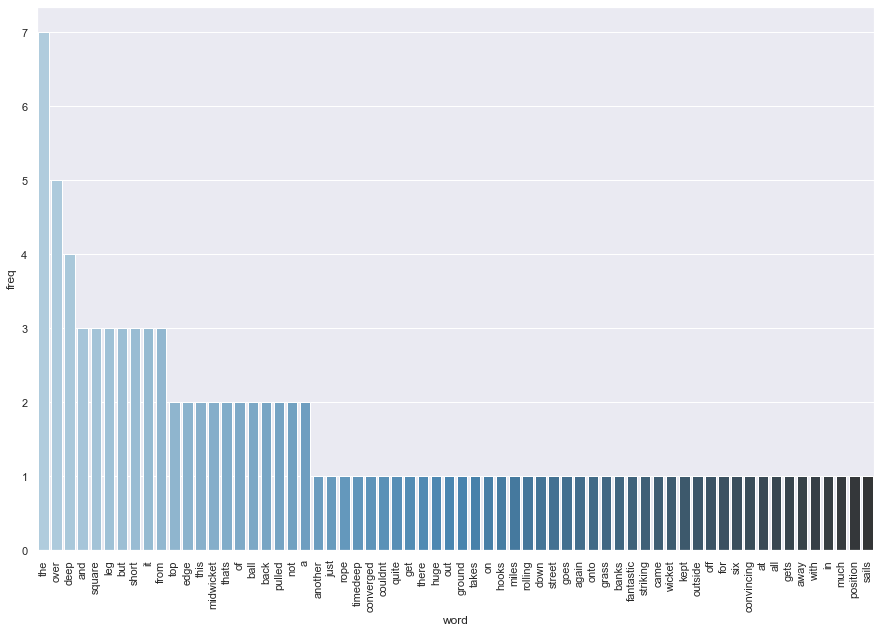

In [24]:
af.graph_seaborn_barplot(sixes_freq, x = sixes_freq['word'], y = sixes_freq['freq'])

In [25]:
def graph_vocab(vocab_dict):
    vocab_dict = pd.Series(vocab_dict)
    vocab_dict = af.series_to_df(vocab_dict, ['Words', 'Frequency'])
    af.graph_seaborn_barplot(vocab_dict, vocab_dict['Words'], vocab_dict['Frequency'])

In [26]:
# graph_vocab(fours_dict)

In [27]:
# graph_vocab(wickets_dict)

In [28]:
test_commentary = fifth_ashes_test.loc[:, ['commentTextItems', 'isFour', 'isSix', 'isWicket']]

In [29]:
test_commentary.head()

,commentTextItems,isFour,isSix,isWicket
0,"Padded up first ball, broad tumbles over and s...",False,False,False
1,"Full, angling into the pads, defended to mid-on",False,False,False
2,"Full outside off, 129kph, left alone",False,False,False
3,"Pushed up fuller outside off, warner gets forw...",False,False,False
4,"Back of a length outside off, hint of seam mov...",False,False,False


In [30]:
test_commentary.loc[:, 'noEvent'] = False

In [58]:
for index, row in test_commentary.iterrows():
    print(int(row.loc[['isFour', 'isSix', 'isWicket']].max()))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0


In [31]:
for index, row in test_commentary.iterrows():
    if row['isWicket'] == False:
        if row['isFour'] == False:
            if row['isSix'] == False:
                test_commentary.at[index, 'noEvent'] = True

In [32]:
test_commentary.tail()

,commentTextItems,isFour,isSix,isWicket,noEvent
1311,Carved through point! cummins lands his yorker...,True,False,False,False
1312,Clubbed over mid-off! wood is doing his best t...,True,False,False,False
1313,Pulled into his own stumps! an undignified end...,False,False,True,False
1314,"Back of a length, flashed out to deep point on...",False,False,False,True
1315,Cleaned up by a full-bunger! england lose nine...,False,False,True,False


In [33]:
test_commentary_categorial = test_commentary[['isWicket', 'isFour', 'isSix', 'noEvent']].idxmax(axis=1)
test_commentary_categorial.tail()

1311      isFour
1312      isFour
1313    isWicket
1314     noEvent
1315    isWicket
dtype: object

In [34]:
test_commentary_categorial = test_commentary_categorial.to_frame(name='Ball_Event')
test_commentary_categorial['commentTextItems'] = test_commentary['commentTextItems']

In [35]:
test_commentary_categorial.tail()

,Ball_Event,commentTextItems
1311,isFour,Carved through point! cummins lands his yorker...
1312,isFour,Clubbed over mid-off! wood is doing his best t...
1313,isWicket,Pulled into his own stumps! an undignified end...
1314,noEvent,"Back of a length, flashed out to deep point on..."
1315,isWicket,Cleaned up by a full-bunger! england lose nine...


In [36]:
def categorical_mapping(value):
    mapping = {
        'isFour': 'four',
        'isSix': 'six',
        'isWicket': 'wicket',
        'noEvent': 'no-event'
    }
    try:
        return mapping[value]
    except KeyError:
        return value

In [37]:
test_commentary_categorial['Ball_Event'] = test_commentary_categorial['Ball_Event'].map(categorical_mapping)
test_commentary_categorial.tail()

,Ball_Event,commentTextItems
1311,four,Carved through point! cummins lands his yorker...
1312,four,Clubbed over mid-off! wood is doing his best t...
1313,wicket,Pulled into his own stumps! an undignified end...
1314,no-event,"Back of a length, flashed out to deep point on..."
1315,wicket,Cleaned up by a full-bunger! england lose nine...


In [38]:
train_data = list(test_commentary_categorial['commentTextItems'])
train_data[:5]


['Padded up first ball, broad tumbles over and slides down the pitch! a strangled appeal for lbw by those who stayed on their feet! marginally ridiculous start. too high for lbw',
 'Full, angling into the pads, defended to mid-on',
 'Full outside off, 129kph, left alone',
 'Pushed up fuller outside off, warner gets forward and it squeezes off a thick inside edge to the leg side',
 'Back of a length outside off, hint of seam movement, left alone and that barely carries to billings']

In [39]:
train_labels = list(test_commentary_categorial['Ball_Event'])
train_labels

['no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'wicket',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'wicket',
 'four',
 'no-event',
 'no-event',
 'no-event',
 'wicket',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'four',
 'no-event',
 'no-event',
 'four',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'no-event',
 'four',
 'no-eve

In [40]:
train_label_names = set(train_labels)
train_label_names

{'four', 'no-event', 'six', 'wicket'}

In [46]:
training_set = sklearn.utils.Bunch(data = train_data, labels = train_labels, names = train_label_names)



In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
x_train = count_vect.fit_transform(training_set.data)
x_train.shape

(1316, 1568)

In [49]:
count_vect.vocabulary_.get('bat')

151

In [50]:
count_vect.vocabulary_

{'padded': 959,
 'up': 1480,
 'first': 514,
 'ball': 140,
 'broad': 206,
 'tumbles': 1459,
 'over': 948,
 'and': 98,
 'slides': 1216,
 'down': 410,
 'the': 1381,
 'pitch': 982,
 'strangled': 1302,
 'appeal': 109,
 'for': 550,
 'lbw': 757,
 'by': 219,
 'those': 1399,
 'who': 1524,
 'stayed': 1278,
 'on': 928,
 'their': 1382,
 'feet': 486,
 'marginally': 826,
 'ridiculous': 1093,
 'start': 1274,
 'too': 1432,
 'high': 660,
 'full': 566,
 'angling': 102,
 'into': 706,
 'pads': 961,
 'defended': 369,
 'to': 1425,
 'mid': 836,
 'outside': 944,
 'off': 919,
 '129kph': 14,
 'left': 765,
 'alone': 93,
 'pushed': 1041,
 'fuller': 567,
 'warner': 1499,
 'gets': 582,
 'forward': 554,
 'it': 711,
 'squeezes': 1265,
 'thick': 1388,
 'inside': 703,
 'edge': 437,
 'leg': 766,
 'side': 1185,
 'back': 130,
 'of': 918,
 'length': 770,
 'hint': 664,
 'seam': 1138,
 'movement': 864,
 'that': 1380,
 'barely': 148,
 'carries': 237,
 'billings': 171,
 'at': 120,
 'stump': 1318,
 'squared': 1259,
 'touch': 14

In [51]:
def cat_to_num(labels, label_names):
    mapping = {cat:i for i,cat in enumerate(label_names)}
    labels_nums = [mapping[label] for label in labels]
    return labels_nums

In [52]:
training_set.labels = cat_to_num(training_set.labels, training_set.names)
training_set.labels[-5:]


[1, 1, 0, 0, 0]

In [53]:
training_set.labels[-5:]

[1, 1, 0, 0, 0]

In [54]:
training_set.labels = np.array(training_set.labels)
training_set.labels[-5:]

array([1, 1, 0, 0, 0])

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer  = TfidfTransformer()
x_train_tfidf = tf_transformer.fit_transform(x_train)
x_train_tfidf.shape

(1316, 1568)

In [59]:
test_commentary = fifth_ashes_test.loc[:, ['commentTextItems', 'isFour', 'isSix', 'isWicket']]

In [71]:
test_commentary_labels = af.create_labels(test_commentary, ['isFour', 'isSix', 'isWicket'], 'noEvent')
test_commentary_labels.tail()

,labels,commentTextItems
1311,isFour,Carved through point! cummins lands his yorker...
1312,isFour,Clubbed over mid-off! wood is doing his best t...
1313,isWicket,Pulled into his own stumps! an undignified end...
1314,noEvent,"Back of a length, flashed out to deep point on..."
1315,isWicket,Cleaned up by a full-bunger! england lose nine...


In [72]:
train_set = af.package_data(test_commentary_labels['commentTextItems'], test_commentary_labels['labels'])

In [74]:
train_set.data[-5:]

['Carved through point! cummins lands his yorker, but wood backs away to leg and has a swing. hits him low on the bat, and he skews it away square',
 'Clubbed over mid-off! wood is doing his best to earn himself a bbl deal for next winter. clears the front leg as cummins drops shorter, and slaps it over the infield',
 'Pulled into his own stumps! an undignified end to a solid series from wood. he knew it would be short, jumping across to the off side, but was rushed on the hook and bottom-edged it straight into the base of middle. england have lost 9 for 55',
 'Back of a length, flashed out to deep point on the cut',
 "Cleaned up by a full-bunger! england lose nine wickets in the nighttime session, and 10 for 56 all told. robinson backed away to leg and threw the bat. cummins' yorker was overpitched, but robinson had stepped too far back to reach it, and watched it miss the toe and crash into the base of off stump"]

In [75]:
train_set.labels[-5:]

array([2, 2, 0, 1, 0])

In [76]:
train_set.label_names

['isWicket', 'noEvent', 'isFour', 'isSix']